In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%%capture
import sys
sys.path.append('/home/alok-kumar/ML_Work/HandsonML/MNIST/nb_scripts')
import mnist_binary_clf as mbc

## Multiclass classification

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns

In [5]:
mbc.sgd_clf.fit(mbc.X_train, mbc.y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [6]:
mbc.sgd_clf.predict([mbc.some_digit])

array([ 5.])

In [7]:
# call the decision function to see all the class scores
some_digit_scores = mbc.sgd_clf.decision_function([mbc.some_digit])
some_digit_scores

array([[-363961.43328244, -333116.25683915, -309346.48384907,
        -279172.77760081, -228650.01442037,   52564.50192909,
        -301767.24071802, -359971.92503153,  -13336.11669932,
        -218236.65440523]])

In [8]:
np.argmax(some_digit_scores)

5

In [9]:
mbc.sgd_clf.classes_

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [10]:
mbc.sgd_clf.classes_[5]

5.0

In [11]:
# onevsone classifier using sgdClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import SGDClassifier

ovo_classifier = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_classifier.fit(mbc.X_train, mbc.y_train)
ovo_classifier.predict([mbc.some_digit])

/home/alok-kumar/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([ 5.])

In [12]:
len(ovo_classifier.estimators_)

45

In [13]:
# train a random forest classifier
mbc.forest_clf.fit(mbc.X_train, mbc.y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [14]:
mbc.forest_clf.predict([mbc.some_digit])

array([ 5.])

In [15]:
# get the probabilities of all classes in random forest classifier
mbc.forest_clf.predict_proba([mbc.some_digit])

array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0.9,  0. ,  0. ,  0.1,  0. ]])

In [16]:
# apply cross validation on sgdclf
from sklearn.model_selection import cross_val_score

cross_val_score(mbc.sgd_clf, mbc.X_train, mbc.y_train, cv=3, scoring="accuracy")

array([ 0.86217756,  0.8659433 ,  0.85727859])

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(mbc.X_train.astype(np.float64))
cross_val_score(mbc.sgd_clf, X_train_scaled, mbc.y_train, cv=3, scoring="accuracy")

array([ 0.91126775,  0.91269563,  0.90973646])

## Error analysis

In [18]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(mbc.sgd_clf, X_train_scaled, mbc.y_train, cv=3)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(mbc.y_train, y_train_pred)
conf_mat

array([[5736,    2,   21,    9,   13,   43,   44,   10,   40,    5],
       [   2, 6474,   49,   23,    6,   41,    7,   11,  117,   12],
       [  62,   35, 5349,   98,   83,   21,   87,   55,  155,   13],
       [  49,   38,  141, 5345,    2,  230,   36,   55,  135,  100],
       [  17,   28,   35,    6, 5373,    9,   51,   28,   92,  203],
       [  67,   43,   39,  179,   75, 4624,  119,   29,  156,   90],
       [  32,   25,   49,    1,   43,   82, 5637,    5,   44,    0],
       [  23,   24,   73,   30,   56,   10,    5, 5808,   17,  219],
       [  53,  151,   76,  146,   14,  160,   51,   30, 5037,  133],
       [  37,   32,   28,   87,  151,   36,    2,  200,   85, 5291]])

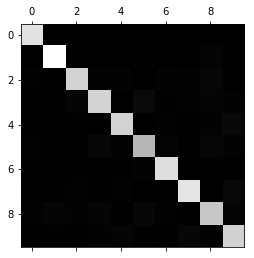

In [19]:
# imagary representation of confusion matrix

plt.matshow(conf_mat, cmap=plt.cm.gray)
plt.show()

In [20]:
row_sums = conf_mat.sum(axis=1, keepdims=True)
norm_conf_mat = conf_mat / row_sums

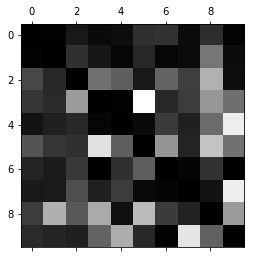

In [21]:
np.fill_diagonal(norm_conf_mat, 0)
plt.matshow(norm_conf_mat, cmap=plt.cm.gray)
plt.show()

In [23]:
# plot for 3's and 5's
cl_a, cl_b = 3, 5
X_aa = mbc.X_train[(mbc.y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = mbc.X_train[(mbc.y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = mbc.X_train[(mbc.y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = mbc.X_train[(mbc.y_train == cl_b) & (y_train_pred == cl_b)]

In [25]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

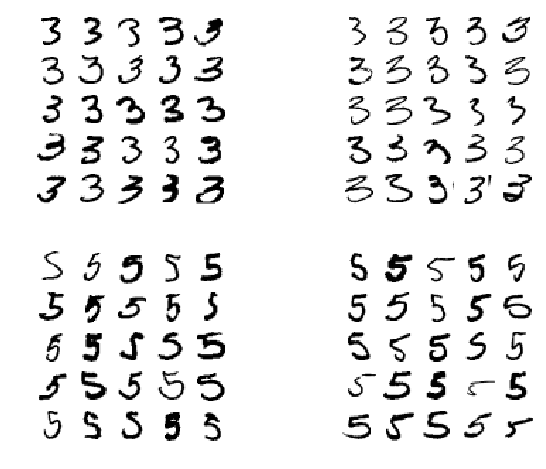

In [26]:
plt.figure(figsize=(10, 8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()